In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Hall of Fame : Nominations and Inductions

### Table: Hall of Fame

#### For this analysis, we will make observations on patterns of how Hall of Fame nominations and inductions have occured over the years and see if there are any interesting revealations.

In [2]:

#loading the hall of fame table
hof = pd.read_csv('./core/HallofFame.csv')

In [3]:
hof.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


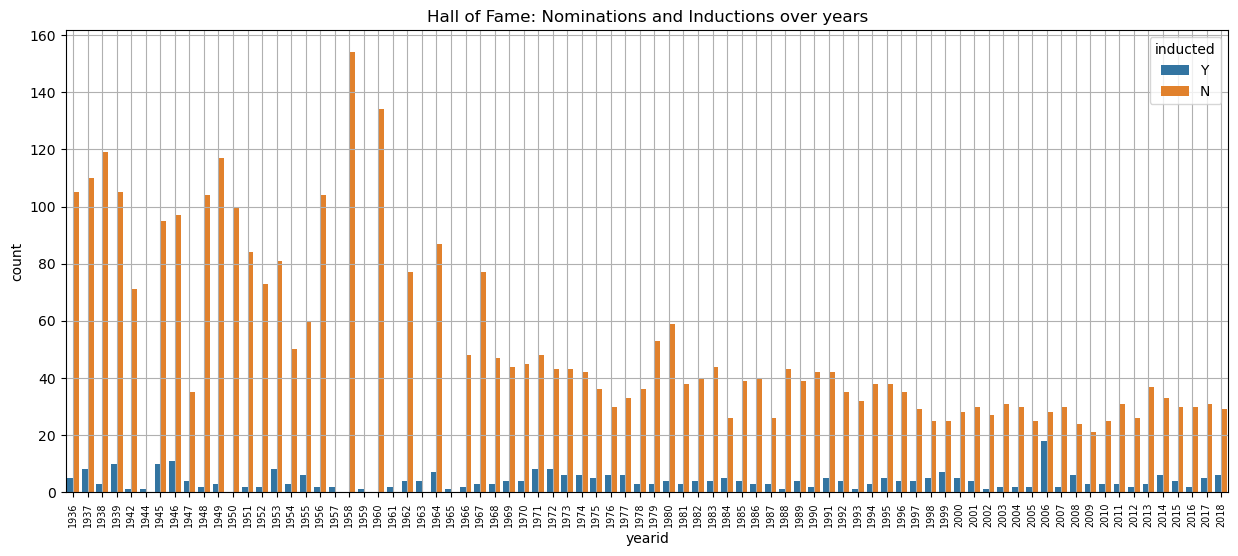

In [12]:
#Count of HOFs by year

plt.figure(figsize=(15,6))
hof_countplot = sns.countplot(x='yearid',data=hof,hue='inducted')

hof_countplot.set_xticks(hof_countplot.get_xticks(), hof_countplot.get_xticklabels(), rotation = 90, ha = 'center', fontsize = 'x-small')
hof_countplot.set_title("Hall of Fame: Nominations and Inductions over years")
hof_countplot.grid(True)

### Observation : 1958 was the year with maximum hall of fame values but no one was inducted.

### Reason: In 1958, no players received the required 75% of BBWAA ballots for election to the Hall. The top vote getter was future electee Max Carey, who was named by 51.1% of the writers. Because the Veterans Committee held no vote, there was no induction ceremony in Cooperstown.

### Observation : 2006 was the year with maximum inductions.

### More Info: In 2006, A record 18 inductees made up the largest single class in history.

This analysis could be useed to study hall of fame patterns in future and include them in performance and incentive related studies.

## Analysis 2 : 

### Table: Salaries and Teams

#### For this analysis, we will aim to find out how has mean salaries changed over the years for teams and what are the teams with maximum salaries. We will also find out whether or not one of the reasons for a team to be a team that has maximum salaries is their consistent or better performance in games in terms of wins and ranks.

In [6]:
sal = pd.read_csv("./core/Salaries.csv")

In [7]:
sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [8]:
#lets look at the mean salaries over the years
sal_by_year = sal.groupby(by='yearID').agg({'salary':'mean'}).reset_index()
new_columns = ['yearID','mean_salary']
sal_by_year.columns = new_columns

In [9]:
sal_by_year['mean_salary'] = pd.to_numeric(sal_by_year['mean_salary'])


In [10]:
pd.set_option('display.float_format', str)

Text(0.5, 1.0, 'Team Mean Salaries over the years')

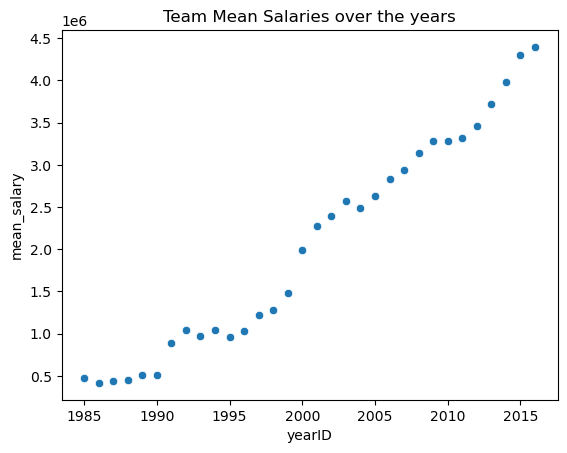

In [13]:
team_sal_scatterplot = sns.scatterplot(x='yearID',y='mean_salary',data=sal_by_year);
team_sal_scatterplot.set_title("Team Mean Salaries over the years")

### Looks like a normal behaviour, the mean salary has increased over the years. It is mainly because of the 'money' reasons like:
    - More funds 
    - Sport has become more of an entertainment thing and more and more 'viewers' keep adding up
    - More sponsor deals

In [15]:
#lets find out teams with maximum average salary every year

sal.salary.max()

33000000

In [16]:
#mean salaries for each team by year


team_mean_sal = sal.groupby(['yearID','teamID']).agg({'salary':'mean'}).reset_index()
team_mean_sal = team_mean_sal.rename(columns={'salary': 'mean_salary'})

In [17]:
#max mean salaries by year
year_max_sal = team_mean_sal.groupby(['yearID']).agg({'mean_salary':'max'}).reset_index()

In [18]:
#joining the two tables above to find out team id with maximum mean salary for each year

year_team_sal = pd.merge(team_mean_sal,year_max_sal,on=['yearID','mean_salary'])

In [24]:
#lets look at the team ids and their counts as teams with maximum mean salary
max_salary_counts = year_team_sal['teamID'].value_counts()

It can be seen that NYA has been the team with maximum mean salary for maximum number of years. Therefore, further analysis concerns NYA

In [25]:
#nya with its mean salaries over the years:

nya_mean_sal_over_years = year_team_sal[year_team_sal['teamID']=='NYA']

c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


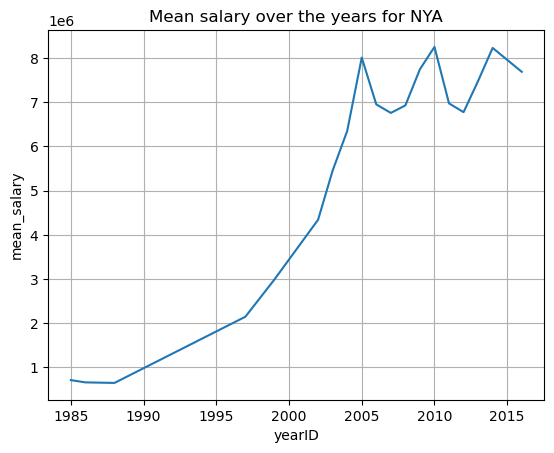

In [29]:
nya_salary_lineplot = sns.lineplot(x='yearID',y='mean_salary',data=nya_mean_sal_over_years)
nya_salary_lineplot.set_title("Mean salary over the years for NYA")
nya_salary_lineplot.grid(True);

Let's find out counts of teams being the teams with maximum mean salaries over the years.

In [31]:
#teams with maximum salary and their counts of being teams with max salary from 1985-2016
team_and_sal = pd.DataFrame(year_team_sal['teamID'].value_counts()).reset_index()

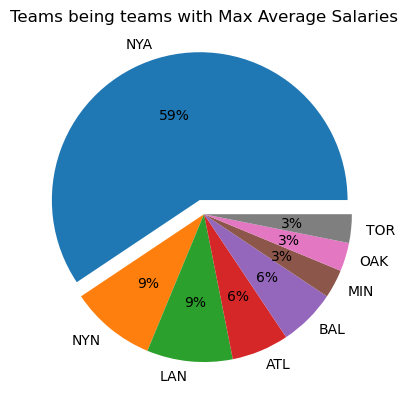

In [35]:
explode = [0.1 if teamID == 'NYA' else 0 for teamID in list(team_and_sal.teamID.unique())]

rank_pichart = plt.pie(team_and_sal['count'],labels=team_and_sal['teamID'],explode=explode,autopct='%1.0f%%')
plt.title("Teams being teams with Max Average Salaries");


In [36]:
#let's find out NYA's performance over the years and see if them being the team with max salary is justified by their performance.

In [39]:
teams = pd.read_csv("./core/Teams.csv")

In [41]:
team_wins = teams.groupby(by='teamID').agg({'W':'sum'}).reset_index()

In [43]:
#This shows that NYA is on postition second in number of wins
team_wins.sort_values('W',ascending=False)

,teamID,W
34,CHN,10803
92,NYA,10175
105,PIT,10158
124,SLN,9959
37,CIN,9908
...,...,...
126,SPU,2
98,PH3,2
69,KEO,1
10,BL4,0


In [44]:
#lets see NYA's rank distribution
nya_stats = teams[teams['teamID']=='NYA']

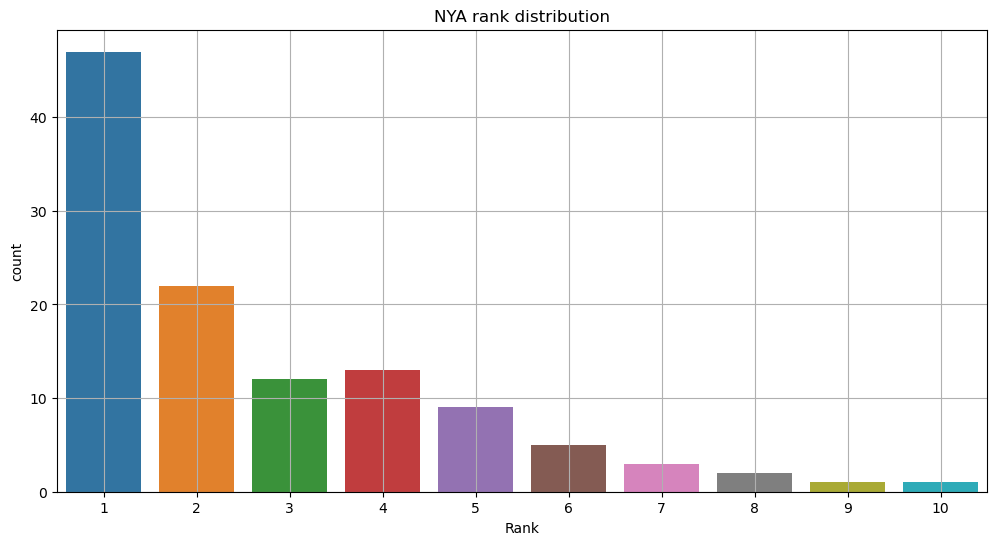

In [46]:
plt.figure(figsize=(12,6))
nya_rank_countplot = sns.countplot(x='Rank',data=nya_stats)
nya_rank_countplot.set_title("NYA rank distribution")
nya_rank_countplot.grid(True)

In [36]:
# Turns out, performance could be a reason of the highest average salary. Ranked by the wins NYA is on 2nd position and when rank distribution is plotted, rank 1 has the highest
#count as compared to other counts

### Could the reason for NYA being the team with highest average salary be their performance? i.e. has their mean salary increased as a result of their better performance in terms of wins and ranks in the past?

    ### It *could* be 
        - The lineplot for median salaries for nya shows a genereal increasing trend with two dips between 2005 and 2015
        - from the years 1985-2016 NYA has been the team with maximum average salary among all teams for 59% of the time, the pie chart shows that
        - The rank distribution over the year i.e. the barplot shows that NYA has been ranked 1st 47 times and have barely left the top 5 rankings

        these are indicators of good performance and thus, one of the reasons that it is a team with maximum average salary could be their performance.

This analysis could be really resourceful for the times when grants are to be given to the teams based on the needs. For example, the teams who have performed good enough but salaries do not correspond to their performance can be analysed and one of the starter points for that analysis could be this one. Also, this analysis can be used by anyone trying to study the money distribution and imbalances in salaries.